<a href="https://www.kaggle.com/mustafabozka/120-years-of-olympic-history-athletes-notebook-eda?scriptVersionId=88186323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasciencebootcampdatasets/sample_submission.csv
/kaggle/input/datasciencebootcampdatasets/international-airline-passengers.csv
/kaggle/input/datasciencebootcampdatasets/polinomsal_regresyon_veriseti_20220209.csv
/kaggle/input/datasciencebootcampdatasets/kanser.csv
/kaggle/input/datasciencebootcampdatasets/ortopedik_hastalarin_biyomekanik_ozellikleri_20220209.csv
/kaggle/input/datasciencebootcampdatasets/University_Rankings_20220204.csv
/kaggle/input/datasciencebootcampdatasets/universite_siralamasi_20220204.csv
/kaggle/input/datasciencebootcampdatasets/dogrusal_regresyon_veriseti_20220209.csv
/kaggle/input/datasciencebootcampdatasets/olimpiyatlar_temizlenmis_20220204.csv
/kaggle/input/datasciencebootcampdatasets/egitim.csv
/kaggle/input/datasciencebootcampdatasets/test.csv
/kaggle/input/datasciencebootcampdatasets/coklu_dogrusal_regresyon_veriseti_20220209.csv
/kaggle/input/datasciencebootcampdatasets/veriseti_20220203_olimpiyatlar.csv
/kaggle/input/120-years-of-olympic

In [2]:
import matplotlib.pyplot as plt
#set figure size for plotting
plt.rcParams["figure.figsize"]=(15,9)
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

In [3]:
veri=pd.read_csv("../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

In [4]:
veri.rename(columns={'ID':'id',
                     'Name':'isim',
                     'Sex':'cinsiyet',
                     'Age':'yas',
                     'Height':'boy',
                     'Weight':'kilo',
                     'Team':'takim',
                     'NOC':'uok',
                     'Games':'oyunlar',
                     'Year':'yil',
                     'Season':'sezon',
                     'City':'sehir',
                     'Sport':'spor',
                     'Event':'etkinlik',
                     'Medal':'madalya'
    
    },inplace=True)

In [5]:
veri.head()

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        271116 non-null  int64  
 1   isim      271116 non-null  object 
 2   cinsiyet  271116 non-null  object 
 3   yas       261642 non-null  float64
 4   boy       210945 non-null  float64
 5   kilo      208241 non-null  float64
 6   takim     271116 non-null  object 
 7   uok       271116 non-null  object 
 8   oyunlar   271116 non-null  object 
 9   yil       271116 non-null  int64  
 10  sezon     271116 non-null  object 
 11  sehir     271116 non-null  object 
 12  spor      271116 non-null  object 
 13  etkinlik  271116 non-null  object 
 14  madalya   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
veri=veri.drop(['id','oyunlar'],axis=1)


In [8]:
veri.columns

Index(['isim', 'cinsiyet', 'yas', 'boy', 'kilo', 'takim', 'uok', 'yil',
       'sezon', 'sehir', 'spor', 'etkinlik', 'madalya'],
      dtype='object')

In [9]:
essiz_etkinlik=pd.unique(veri.etkinlik)
essiz_etkinlik[:10]


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [10]:
essiz_etkinlik.shape,essiz_etkinlik.size

((765,), 765)

In [11]:
veri_gecici=veri.copy()

In [12]:
veri_gecici.etkinlik.size

271116

In [13]:
type(veri_gecici["boy"]),veri_gecici["boy"].mean()

(pandas.core.series.Series, 175.33896987366376)

In [14]:
np.round(veri_gecici["boy"].mean(),2)

175.34

In [15]:
boy_kilo_liste=["boy","kilo"]
for e in essiz_etkinlik:
    etkinlik_filtre=veri_gecici.etkinlik==e
    print(f"toplam etkinlik sayısı {veri_gecici.etkinlik.size}, mevcut etkinlik {e}, aday  sayısı "
          , etkinlik_filtre.sum())
    veri_filtreli=veri_gecici[etkinlik_filtre]
    for s in boy_kilo_liste:
        print(s)
        # mean of competitor height and weight in the same event
        ortalama=np.round(np.mean(veri_filtreli[s]),2)
        # if the mean is nan
        if ~np.isnan(ortalama):
            print(ortalama)
            veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
        else:
            tum_veri_ortalamasi=np.round(np.mean(veri[s]),2)
            veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ortalamasi)
    veri_gecici[etkinlik_filtre]=veri_filtreli

toplam etkinlik sayısı 271116, mevcut etkinlik Basketball Men's Basketball, aday  sayısı  3280
boy
194.87
kilo
91.68
toplam etkinlik sayısı 271116, mevcut etkinlik Judo Men's Extra-Lightweight, aday  sayısı  341
boy
165.69
kilo
61.02
toplam etkinlik sayısı 271116, mevcut etkinlik Football Men's Football, aday  sayısı  5733
boy
177.48
kilo
73.09
toplam etkinlik sayısı 271116, mevcut etkinlik Tug-Of-War Men's Tug-Of-War, aday  sayısı  170
boy
182.48
kilo
95.62
toplam etkinlik sayısı 271116, mevcut etkinlik Speed Skating Women's 500 metres, aday  sayısı  467
boy
167.36
kilo
62.49
toplam etkinlik sayısı 271116, mevcut etkinlik Speed Skating Women's 1,000 metres, aday  sayısı  497
boy
167.66
kilo
62.55
toplam etkinlik sayısı 271116, mevcut etkinlik Cross Country Skiing Men's 10 kilometres, aday  sayısı  294
boy
178.84
kilo
72.38
toplam etkinlik sayısı 271116, mevcut etkinlik Cross Country Skiing Men's 50 kilometres, aday  sayısı  1100
boy
177.05
kilo
71.12
toplam etkinlik sayısı 271116, mev

In [16]:

veri=veri_gecici.copy()
info=veri.info()
yas_ortalamasi=np.round(np.mean(veri.yas),2)
veri["yas"]=veri["yas"].fillna(yas_ortalamasi)
madalya_degiskeni=veri["madalya"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [17]:
#number of   records that have madalya
(~pd.isnull(madalya_degiskeni)).sum()


39783

In [18]:
#filter of non-null madalya rows
madalya_degiskeni_filtresi=~pd.isnull(madalya_degiskeni)
veri=veri[madalya_degiskeni_filtresi]

In [19]:
#save cleaned datasats
veri.to_csv("olimpiyatlar_temizlenmis.csv",index=False)

In [20]:


def plotHistogram(degisken):
    plt.figure()
    plt.hist(veri[degisken],bins=40,color="orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

In [21]:
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


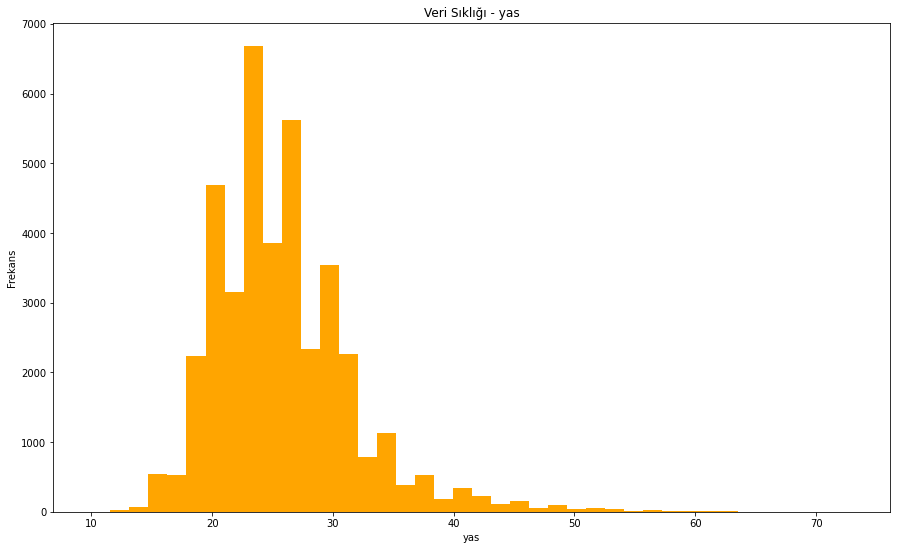

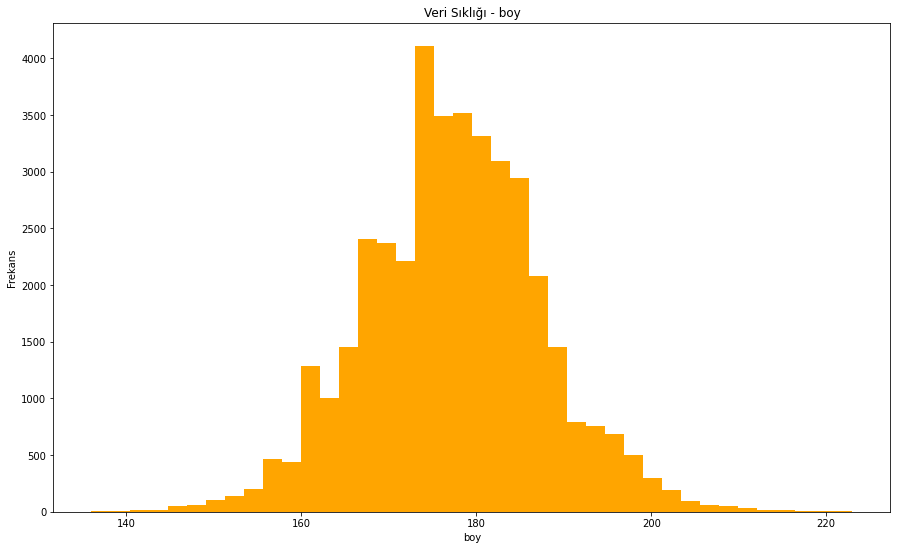

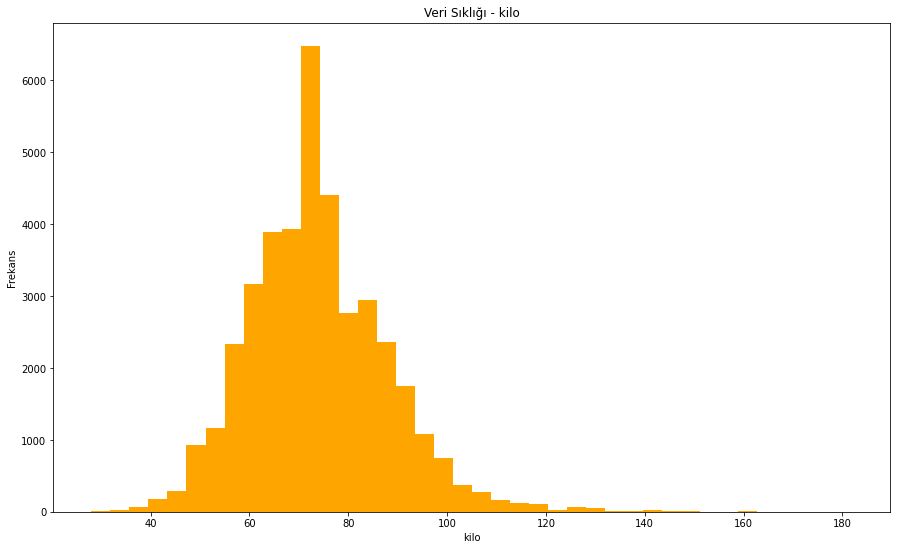

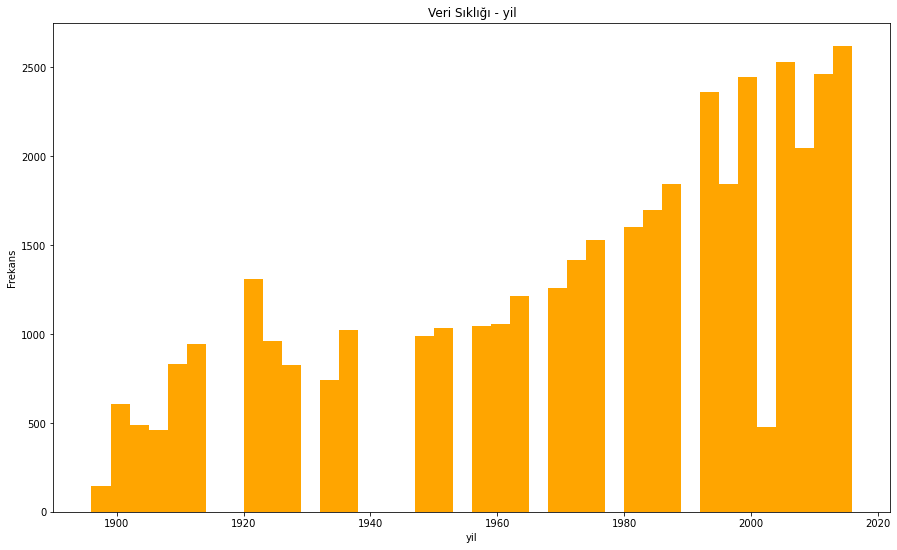

In [22]:
sayisal_degisken=["yas","boy","kilo","yil"]
for i in sayisal_degisken:
    plotHistogram(i)


In [23]:
def plotbox(numericvar):
    plt.boxplot(veri[numericvar])
    plt.title(f"{numericvar} Değişkeni İçin Kutu Grafiği(only Numeric(nicel-quantitative data))")
    plt.xlabel(numericvar)
    plt.ylabel("Değerler")
    plt.show()

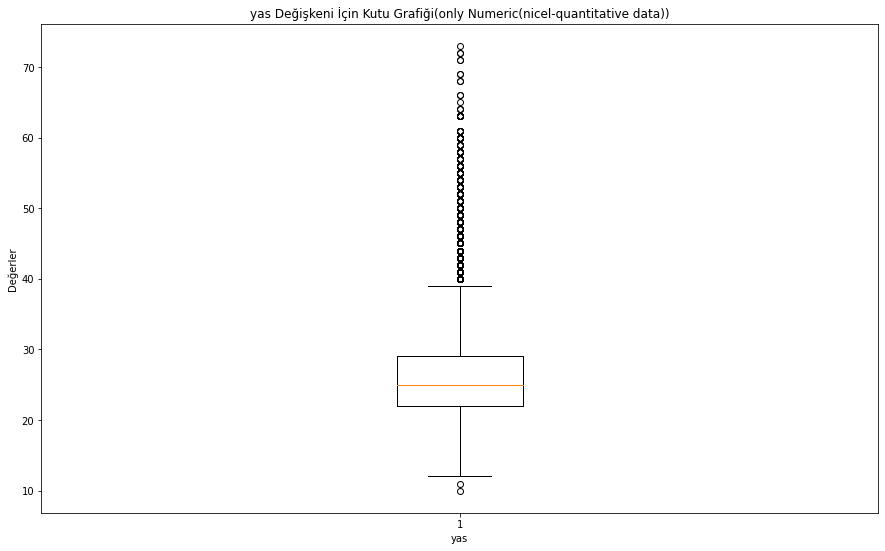

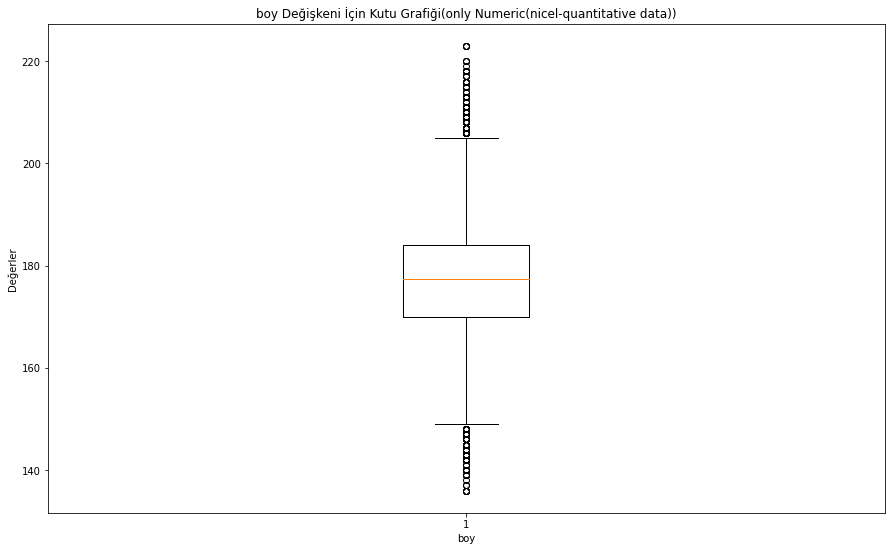

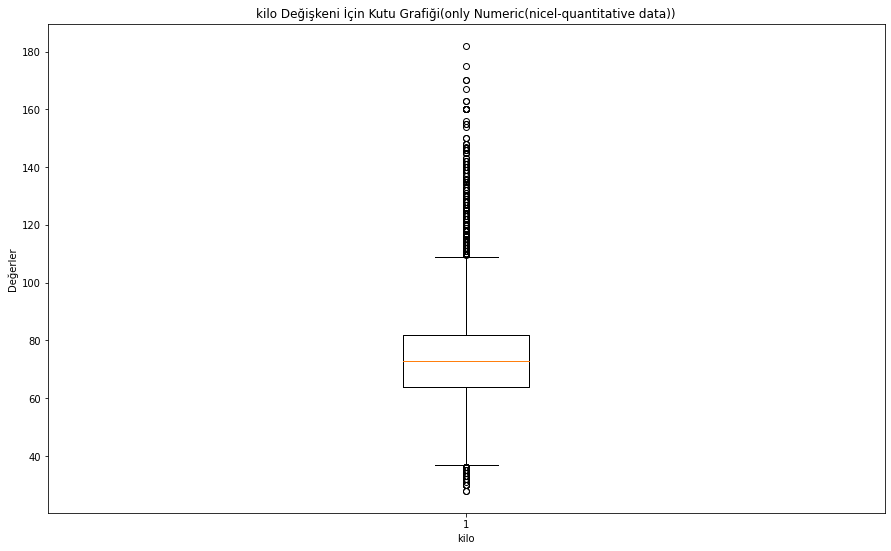

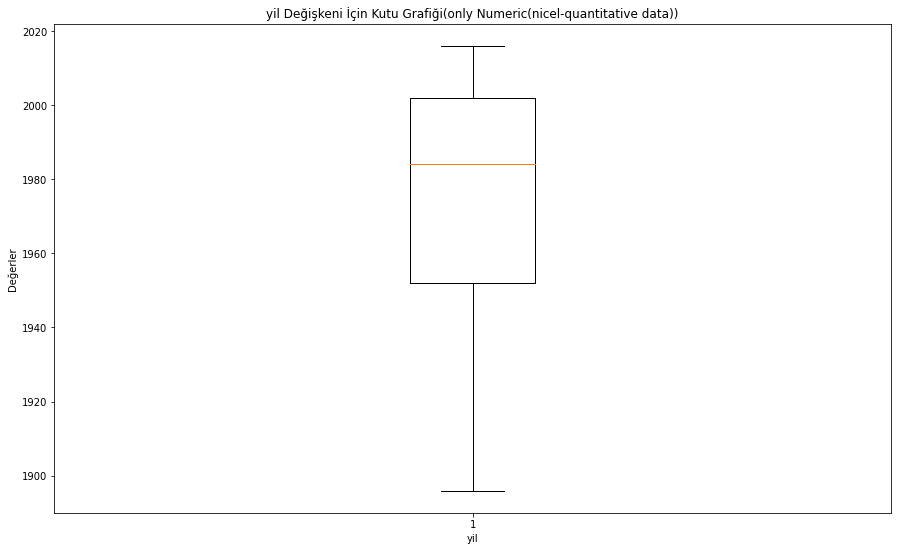

In [24]:
for var in veri.select_dtypes(exclude=["object","category","datetime"]).columns:
    plotbox(var)

In [25]:
# plotting for categorcal values
def plotBar(degisken,n=12):
    veri_=veri[degisken]
    #series of number and its value in selected columns
    veri_sayma=veri_.value_counts()
    veri_sayma=veri_sayma[:n]
    plt.figure()
    #horizontal barplot
    plt.barh(veri_sayma.index,veri_sayma,color="green")
    plt.yticks(veri_sayma.index,veri_sayma.index.values)
    plt.yticks(rotation=0)
    plt.xlabel("Frekans")
    plt.title("Veri sıklığı - {}".format(degisken))
    plt.show()
    print("degisken: {}: \n veri_sayma : \n {}".format(degisken,veri_sayma))
    print("{}: \n {}".format(veri_sayma.index,veri_sayma.values))

In [26]:
qualitative_col= veri.select_dtypes(include=["object","category"]).columns
for var in qualitative_col:
    print(var)

isim
cinsiyet
takim
uok
sezon
sehir
spor
etkinlik
madalya


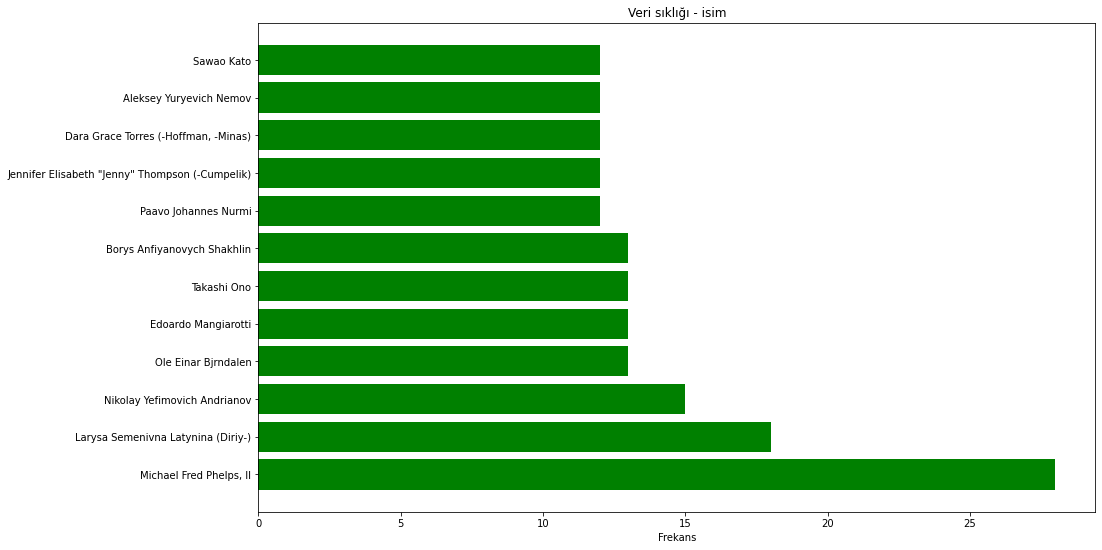

degisken: isim: 
 veri_sayma : 
 Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Ole Einar Bjrndalen                                13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Borys Anfiyanovych Shakhlin                        13
Paavo Johannes Nurmi                               12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Dara Grace Torres (-Hoffman, -Minas)               12
Aleksey Yuryevich Nemov                            12
Sawao Kato                                         12
Name: isim, dtype: int64
Index(['Michael Fred Phelps, II', 'Larysa Semenivna Latynina (Diriy-)',
       'Nikolay Yefimovich Andrianov', 'Ole Einar Bjrndalen',
       'Edoardo Mangiarotti', 'Takashi Ono', 'Borys Anfiyanovych Shakhlin',
       'Paavo Johannes Nurmi',
       'Jennifer Elisabeth "Jenny" Thompson (-Cumpeli

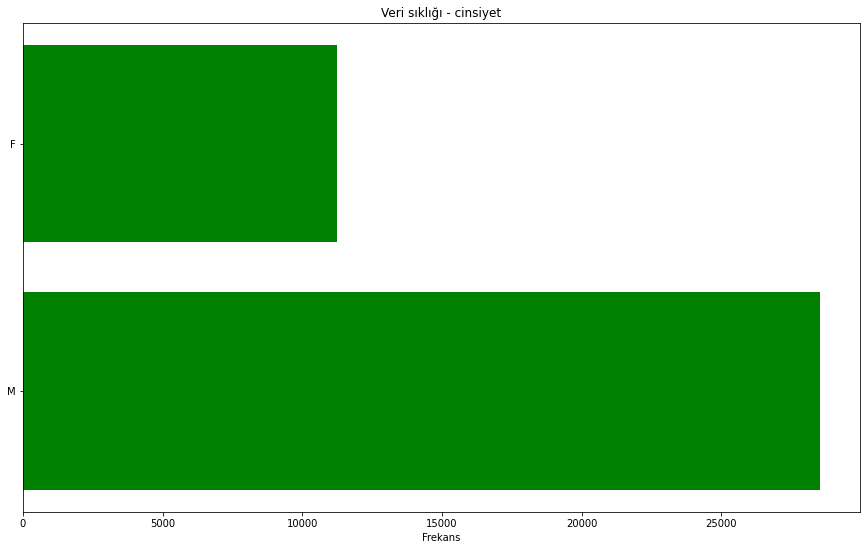

degisken: cinsiyet: 
 veri_sayma : 
 M    28530
F    11253
Name: cinsiyet, dtype: int64
Index(['M', 'F'], dtype='object'): 
 [28530 11253]


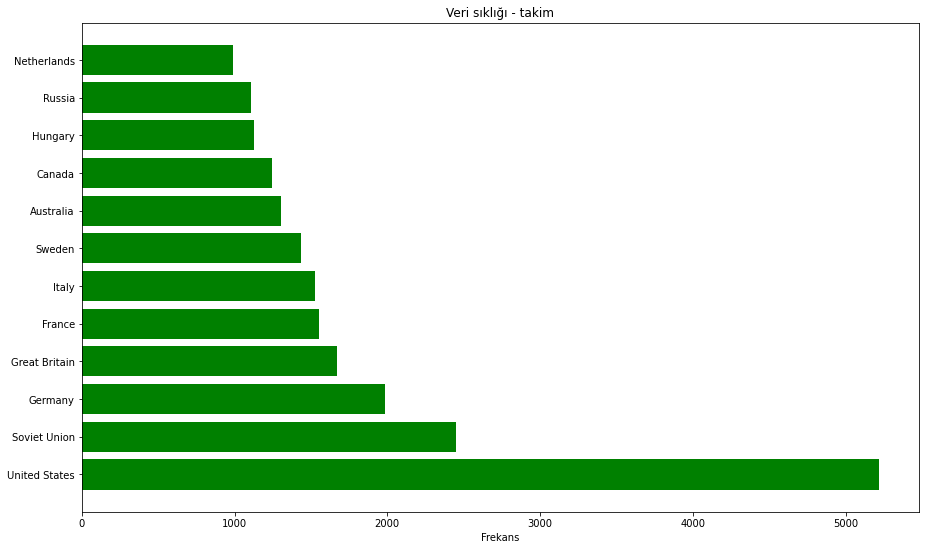

degisken: takim: 
 veri_sayma : 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Russia           1110
Netherlands       988
Name: takim, dtype: int64
Index(['United States', 'Soviet Union', 'Germany', 'Great Britain', 'France',
       'Italy', 'Sweden', 'Australia', 'Canada', 'Hungary', 'Russia',
       'Netherlands'],
      dtype='object'): 
 [5219 2451 1984 1673 1550 1527 1434 1306 1243 1127 1110  988]


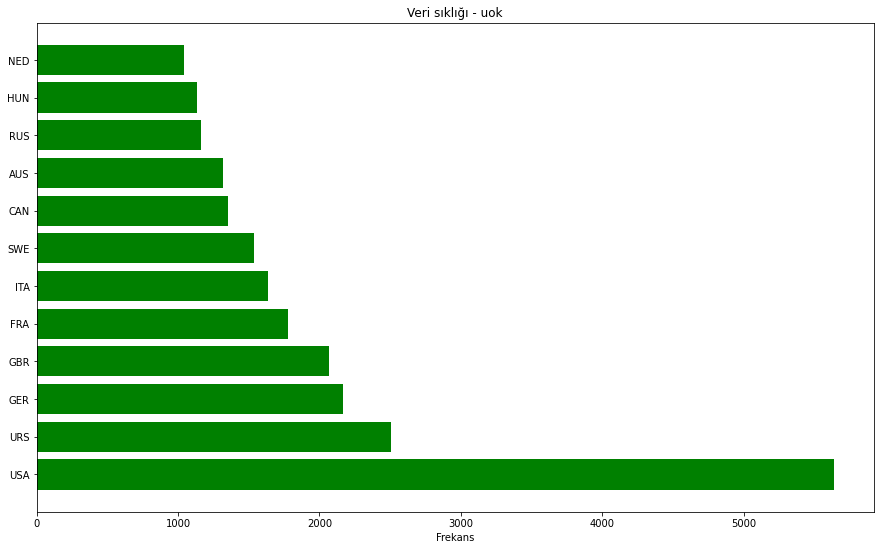

degisken: uok: 
 veri_sayma : 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
HUN    1135
NED    1040
Name: uok, dtype: int64
Index(['USA', 'URS', 'GER', 'GBR', 'FRA', 'ITA', 'SWE', 'CAN', 'AUS', 'RUS',
       'HUN', 'NED'],
      dtype='object'): 
 [5637 2503 2165 2068 1777 1637 1536 1352 1320 1165 1135 1040]


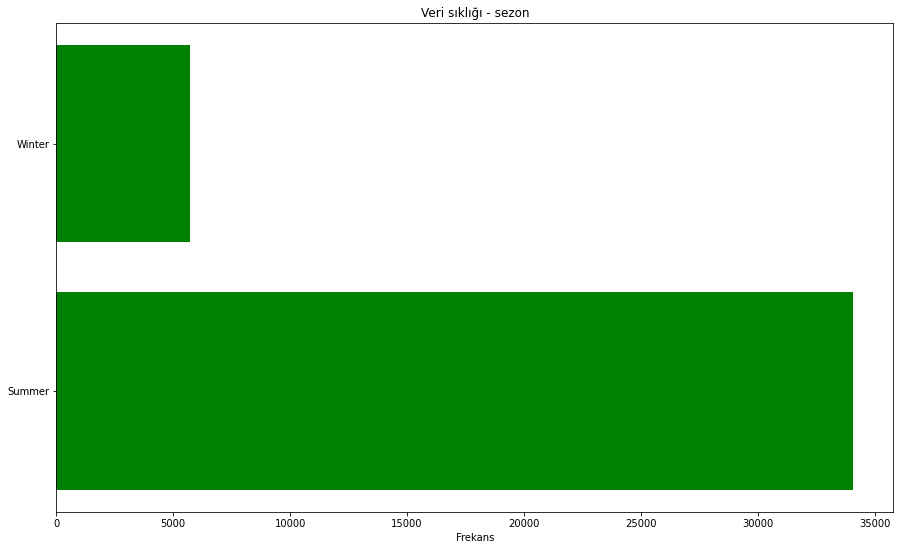

degisken: sezon: 
 veri_sayma : 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64
Index(['Summer', 'Winter'], dtype='object'): 
 [34088  5695]


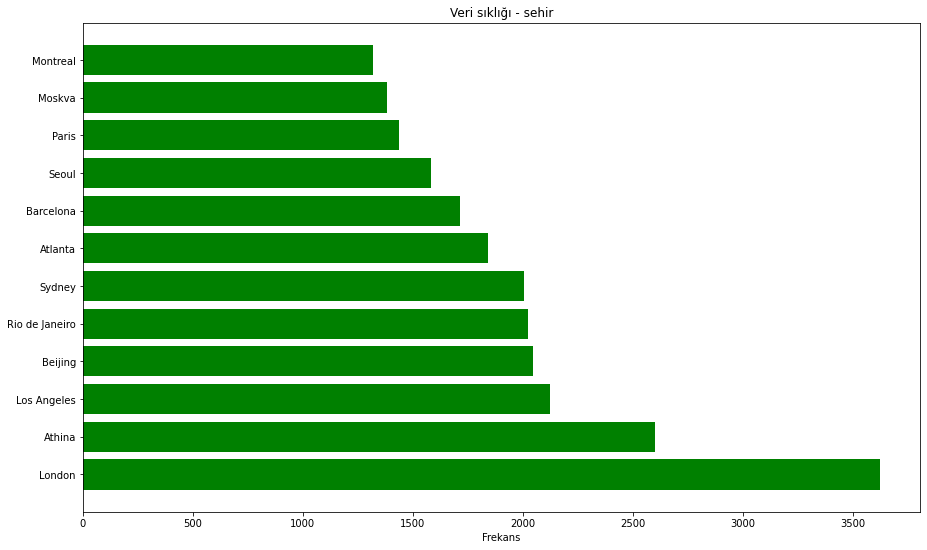

degisken: sehir: 
 veri_sayma : 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Sydney            2004
Atlanta           1842
Barcelona         1712
Seoul             1582
Paris             1436
Moskva            1384
Montreal          1320
Name: sehir, dtype: int64
Index(['London', 'Athina', 'Los Angeles', 'Beijing', 'Rio de Janeiro',
       'Sydney', 'Atlanta', 'Barcelona', 'Seoul', 'Paris', 'Moskva',
       'Montreal'],
      dtype='object'): 
 [3624 2602 2123 2048 2023 2004 1842 1712 1582 1436 1384 1320]


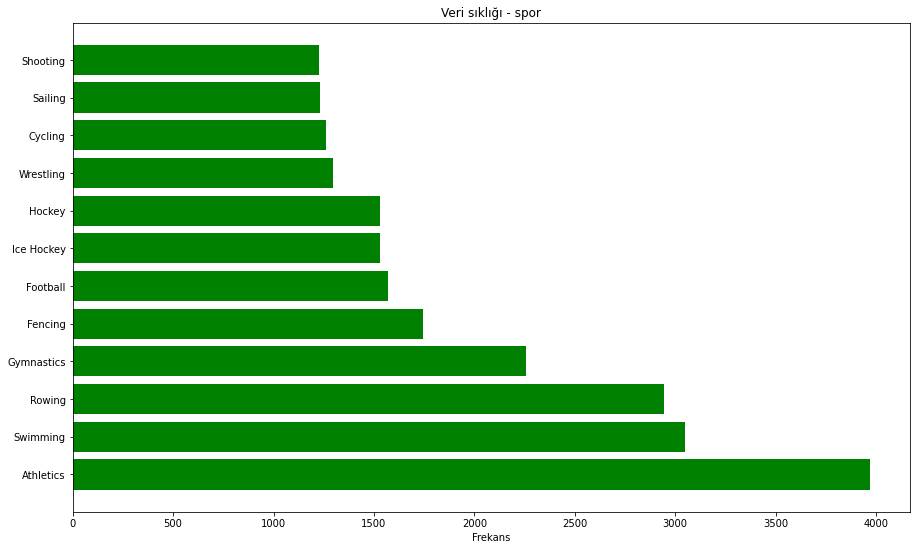

degisken: spor: 
 veri_sayma : 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Football      1571
Ice Hockey    1530
Hockey        1528
Wrestling     1296
Cycling       1263
Sailing       1232
Shooting      1228
Name: spor, dtype: int64
Index(['Athletics', 'Swimming', 'Rowing', 'Gymnastics', 'Fencing', 'Football',
       'Ice Hockey', 'Hockey', 'Wrestling', 'Cycling', 'Sailing', 'Shooting'],
      dtype='object'): 
 [3969 3048 2945 2256 1743 1571 1530 1528 1296 1263 1232 1228]


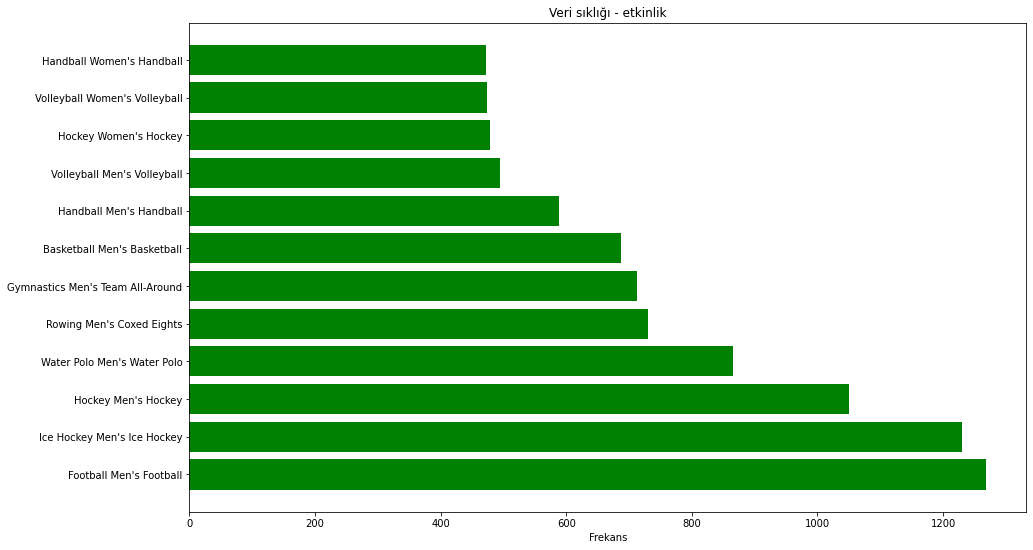

degisken: etkinlik: 
 veri_sayma : 
 Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Basketball Men's Basketball          687
Handball Men's Handball              588
Volleyball Men's Volleyball          495
Hockey Women's Hockey                478
Volleyball Women's Volleyball        474
Handball Women's Handball            472
Name: etkinlik, dtype: int64
Index(['Football Men's Football', 'Ice Hockey Men's Ice Hockey',
       'Hockey Men's Hockey', 'Water Polo Men's Water Polo',
       'Rowing Men's Coxed Eights', 'Gymnastics Men's Team All-Around',
       'Basketball Men's Basketball', 'Handball Men's Handball',
       'Volleyball Men's Volleyball', 'Hockey Women's Hockey',
       'Volleyball Women's Volleyball', 'Handball Women's Handball'],
      dtype='object'): 
 [1269 1230 1050  866 

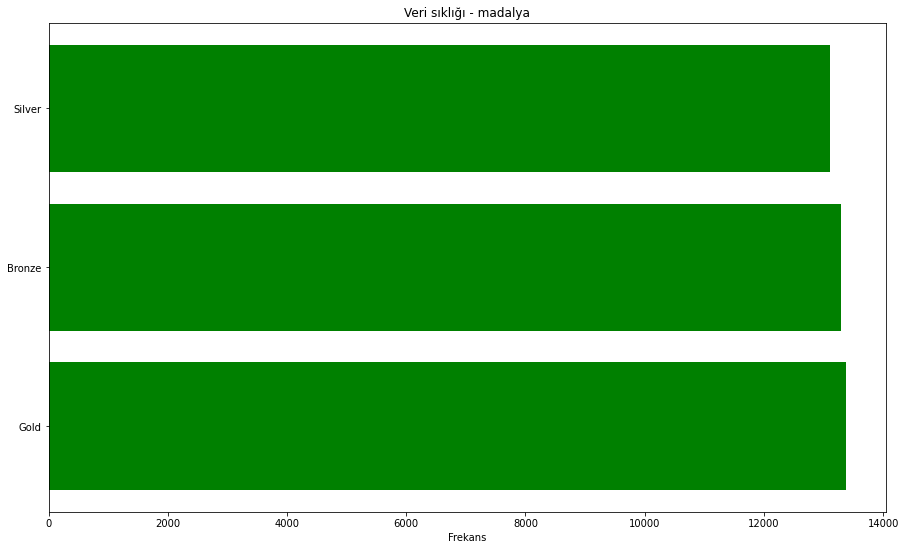

degisken: madalya: 
 veri_sayma : 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64
Index(['Gold', 'Bronze', 'Silver'], dtype='object'): 
 [13372 13295 13116]


In [27]:

for i in qualitative_col:
    plotBar(i)

In [28]:
erkek=veri[veri.cinsiyet=="M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [29]:
kadin=veri[veri.cinsiyet=="F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


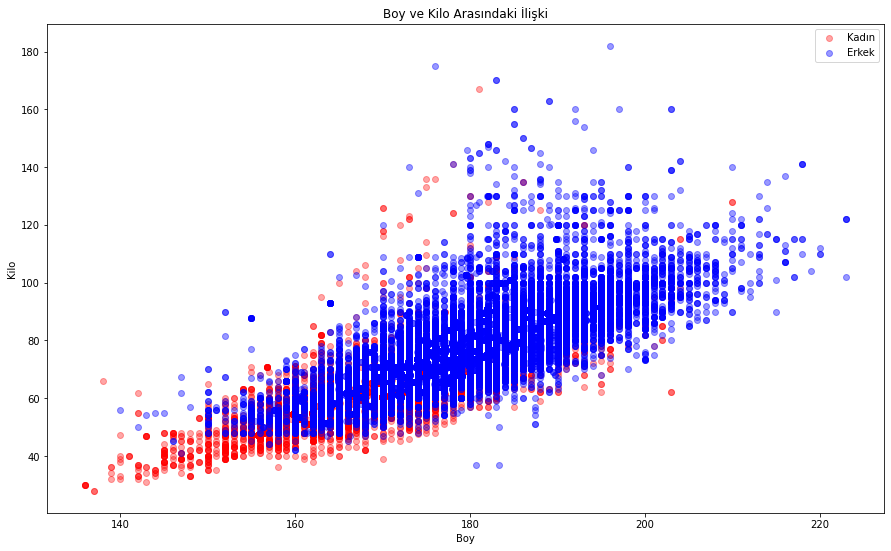

In [30]:
plt.figure()
plt.scatter(kadin.boy,kadin.kilo,alpha=0.35,label="Kadın",color="red")
plt.scatter(erkek.boy,erkek.kilo,alpha=0.4,label="Erkek",color="blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [31]:
veri.iloc[:,[2,3,4]]

,yas,boy,kilo
3,34.0,182.48,95.62
37,30.0,182.01,76.69
38,30.0,177.00,75.00
40,28.0,184.00,85.00
41,28.0,175.00,64.00
...,...,...,...
271078,25.0,168.00,80.00
271080,33.0,168.00,80.00
271082,28.0,182.00,82.00
271102,19.0,171.00,64.00


In [32]:
veri.loc[:,["yas","boy","kilo"]]

,yas,boy,kilo
3,34.0,182.48,95.62
37,30.0,182.01,76.69
38,30.0,177.00,75.00
40,28.0,184.00,85.00
41,28.0,175.00,64.00
...,...,...,...
271078,25.0,168.00,80.00
271080,33.0,168.00,80.00
271082,28.0,182.00,82.00
271102,19.0,171.00,64.00


In [33]:
veri.loc[:,["yas","boy","kilo"]].corr()

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


In [34]:
# appyling one hot encoder for categoric-qualitative data
veri_gecici=veri.copy()
veri_gecici=pd.get_dummies(veri_gecici,columns=['madalya'])
veri_gecici.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [35]:
#correations
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver",]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [36]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:50]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [37]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver",]].groupby(["sehir"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:420]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [38]:
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver",]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by="madalya_Gold",ascending=False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


**Pivot Table**

In [39]:
veri_pivot=veri.pivot_table(index="madalya",columns="cinsiyet",values=["boy","kilo","yas"],aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

**Outliers Detections**

In [40]:
def anomaliTespiti(df,ozellik):
    outlier_indices=[]
    for c in ozellik:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)
        IQR=Q3-Q1
        outlier_step=1.5*IQR
        
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    multiplie_outliers=list(i for i, v in outlier_indices.items() if v > 1)
    return multiplie_outliers
    

In [41]:
(veri_gecici["yas"]<15) | (veri_gecici["yas"]>60).index

3         True
37        True
38        True
40        True
41        True
          ... 
271078    True
271080    True
271082    True
271102    True
271103    True
Length: 39783, dtype: bool

In [42]:
veri_anomali=veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

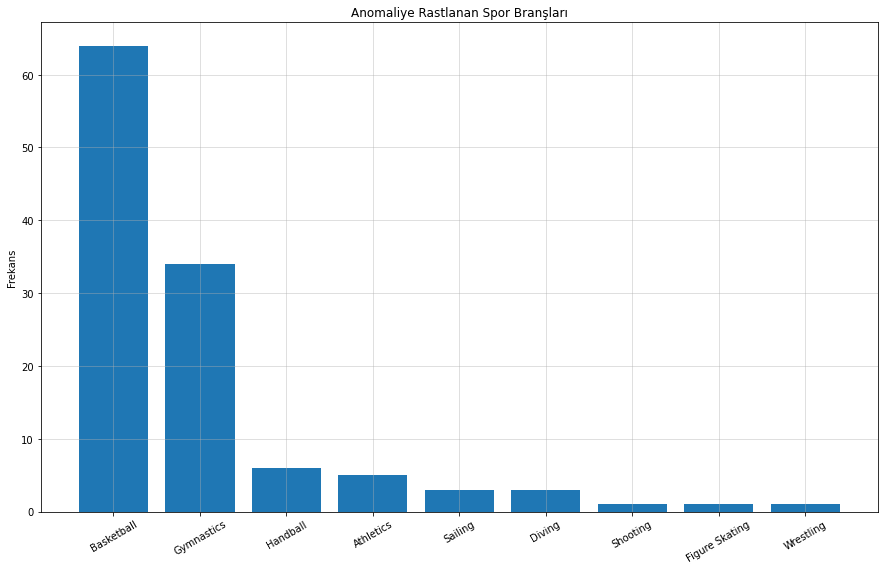

In [43]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5)

In [44]:
veri_gym=veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [45]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

In [46]:
veri_basketbol=veri_anomali[veri_anomali.spor=="Basketball"]
veri_basketbol.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze


In [47]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

In [48]:
veri_zaman=veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [49]:
essiz_yillar=veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [50]:
dizili_array=np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

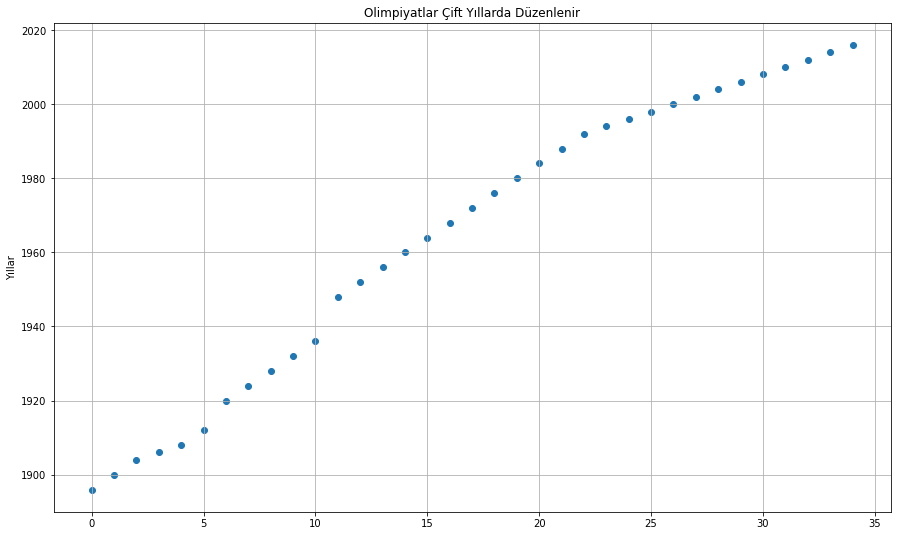

In [51]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [52]:
tarih_saat_nesnesi=pd.to_datetime(veri_zaman["yil"],format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [53]:
veri_zaman["tarih_saat"]=tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [54]:
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace=True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [55]:
periyodik_veri=veri_zaman.resample("2A").mean()
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [56]:
periyodik_veri.dropna(axis=0,inplace=True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 1080x648 with 0 Axes>

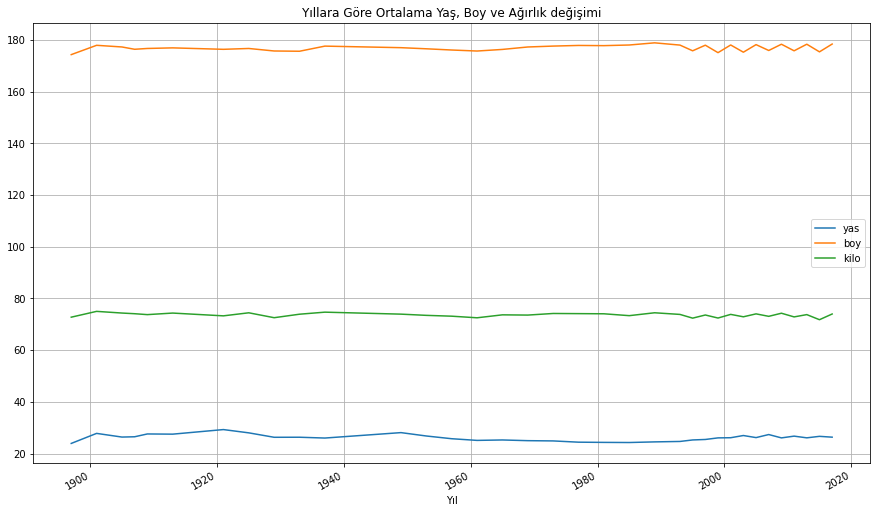

In [57]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş, Boy ve Ağırlık değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [58]:
veri_zaman=pd.get_dummies(veri_zaman,columns=['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [59]:
periyodik_veri=veri_zaman.resample("2A").sum()
periyodik_veri.head()
periyodik_veri=periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 1080x648 with 0 Axes>

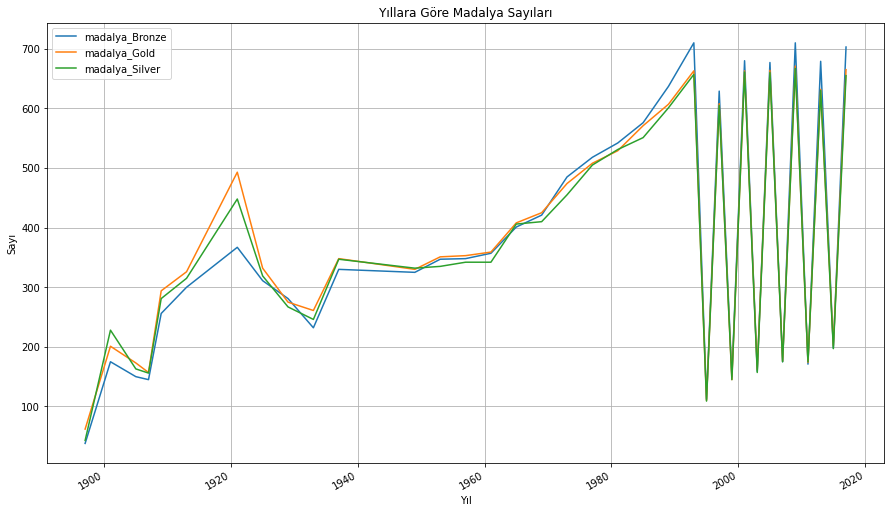

In [60]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [61]:
yaz=veri_zaman[veri_zaman.sezon=="Summer"]
kis=veri_zaman[veri_zaman.sezon=="Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [62]:
periyodik_veri_kis=kis.resample("A").sum()
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis==0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [63]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz==0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 1080x648 with 0 Axes>

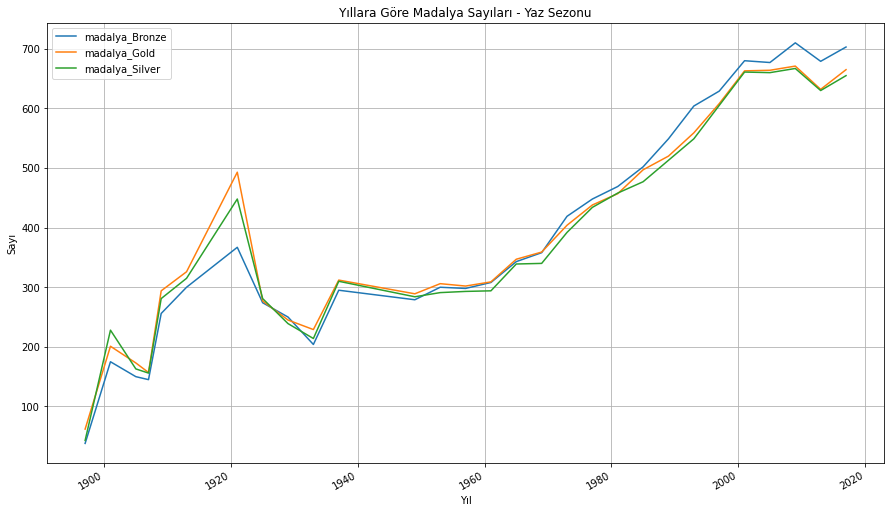

<Figure size 1080x648 with 0 Axes>

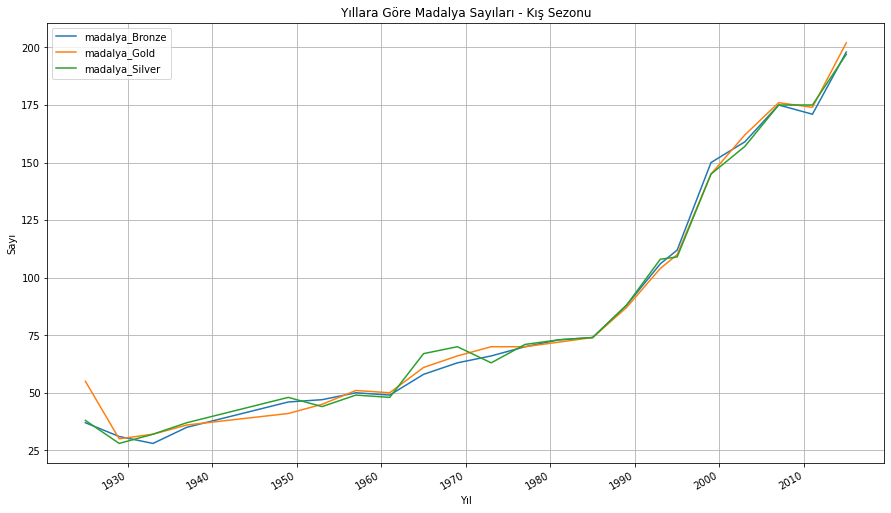

In [64]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()